# Saurabh Kumar | ESET0128  |   Advance Python AIML DAY:7

## Linear Regression

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data=pd.read_csv('/content/Algerian_forest_fires_cleaned_dataset.csv')
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [43]:
print(data)

     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0      1      6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4      5      6  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
242   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI       Classes  Reg

In [44]:
data=data.drop(columns=['day','month','year'],axis=1)

In [45]:
data.isnull().sum()

,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0
ISI,0
BUI,0
FWI,0


In [46]:
data=data.dropna()

In [47]:
data.isnull().sum()

,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0
ISI,0
BUI,0
FWI,0


In [48]:
print(data.columns)

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')


In [49]:
data['Classes']=np.where(data['Classes'].str.contains('not fire'),0,1 )

In [50]:
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [51]:
data.columns.unique()

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [52]:
# # Convert relevant columns to numeric
# for col in data.columns:
#     if col != 'Classes  ': # Exclude the target variable 'Classes  '
#         data[col] = pd.to_numeric(data[col], errors='coerce')

# print(data.dtypes)

In [53]:
x=data.drop(['FWI'],axis=1)
y=data['FWI']

In [54]:
x.isnull().sum()

,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0
ISI,0
BUI,0
Classes,0


In [55]:
print(data.dtypes)

Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region           int64
dtype: object


In [56]:
data.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

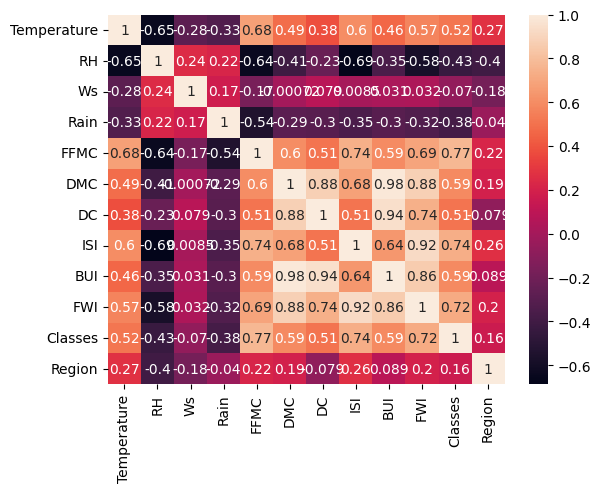

In [57]:
sns.heatmap(data.corr(),annot=True)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [60]:
y_tr=reg.predict(x_train)

In [61]:
print(r2_score(y_train,y_tr))

0.9737558301667233


In [62]:
y_pred=reg.predict(x_test)

0.9890356825759858
0.4267520614689845
0.33231115384863497
0.4267520614689845


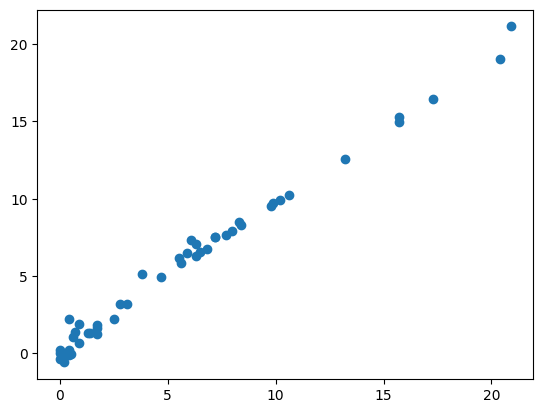

In [63]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r_score=r2_score(y_test,y_pred)
print(r_score)
mean_abs_err=mean_absolute_error(y_test,y_pred)
print(mean_abs_err)
mean_sq_err=mean_squared_error(y_test,y_pred)
print(mean_sq_err)
mean_ab_err=mean_absolute_error(y_test,y_pred)
print(mean_ab_err)
plt.scatter(y_test,y_pred)

0.9860716136089777
0.43695376616322884
0.42214740542924684
0.43695376616322884
[-0.01756866 -0.01170959 -0.0307667   0.00677634 -0.05867486  0.12277176
  0.00439484  1.18025512  0.1326085   0.45311496 -0.30410642]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.270e+02, tolerance: 1.177e+00
  model = cd_fast.enet_coordinate_descent(


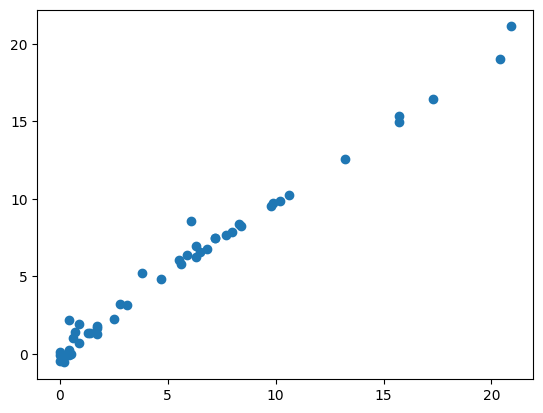

In [64]:
from sklearn.linear_model import Lasso
lasso=Lasso(0.01)
lasso.fit(x_train,y_train)
y_pred_laso=lasso.predict(x_test)

r_score=r2_score(y_test,y_pred_laso)
print(r_score)
mean_abs_err=mean_absolute_error(y_test,y_pred_laso)
print(mean_abs_err)
mean_sq_err=mean_squared_error(y_test,y_pred_laso)
print(mean_sq_err)
mean_ab_err=mean_absolute_error(y_test,y_pred_laso)
print(mean_ab_err)
print(lasso.coef_)
plt.scatter(y_test,y_pred_laso)

0.98903494858169
0.42674101123056074
0.3323334000571234
0.42674101123056074
[-0.01877421 -0.01375948 -0.03263898  0.00436829 -0.06237821  0.06944971
 -0.00416671  1.17410961  0.20491902  0.5933174  -0.35885205]


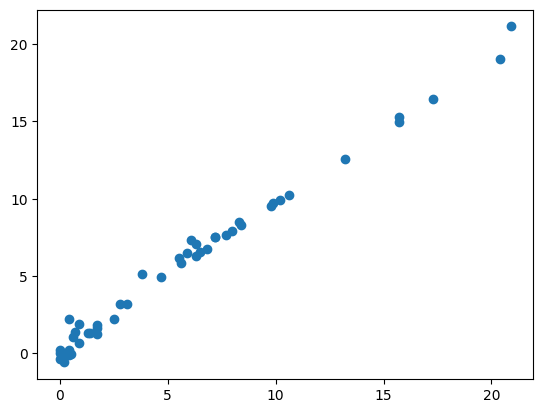

In [65]:
from sklearn.linear_model import Ridge
ridge=Ridge(0.01)
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)

r_score=r2_score(y_test,y_pred_ridge)
print(r_score)
mean_abs_err=mean_absolute_error(y_test,y_pred_ridge)
print(mean_abs_err)
mean_sq_err=mean_squared_error(y_test,y_pred_ridge)
print(mean_sq_err)
mean_ab_err=mean_absolute_error(y_test,y_pred_ridge)
print(mean_ab_err)
print(ridge.coef_)
plt.scatter(y_test,y_pred_ridge)

0.9855032825607928
0.4466792338391253
0.4393726223840797
0.4466792338391253
[-0.01877421 -0.01375948 -0.03263898  0.00436829 -0.06237821  0.06944971
 -0.00416671  1.17410961  0.20491902  0.5933174  -0.35885205]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.492e+02, tolerance: 1.177e+00
  model = cd_fast.enet_coordinate_descent(


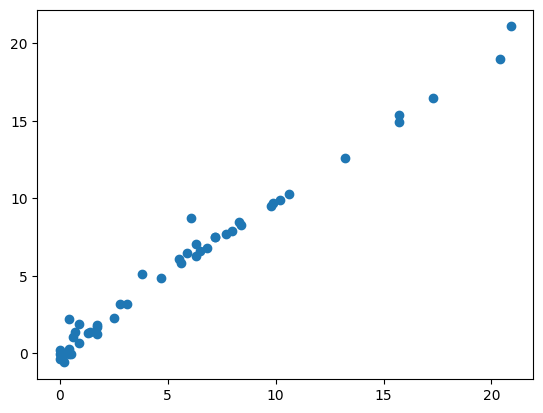

In [66]:
# Elasticnet Regression
from sklearn.linear_model import ElasticNet
elas_Net=ElasticNet(0.005)
elas_Net.fit(x_train,y_train)
y_pred_elas_Net=elas_Net.predict(x_test)

r_score=r2_score(y_test,y_pred_elas_Net)
print(r_score)
mean_abs_err=mean_absolute_error(y_test,y_pred_elas_Net)
print(mean_abs_err)
mean_sq_err=mean_squared_error(y_test,y_pred_elas_Net)
print(mean_sq_err)
mean_ab_err=mean_absolute_error(y_test,y_pred_elas_Net)
print(mean_ab_err)
print(ridge.coef_)
plt.scatter(y_test,y_pred_elas_Net)

## Logisitic Regression

In [69]:
data_logistic=pd.read_csv('/content/Algerian_forest_fires_cleaned_dataset.csv')
data_logistic

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [92]:
data_logistic=data_logistic.drop(columns=['day','month','year'],axis=1)

In [93]:
data_logistic.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [94]:
data_logistic.isnull().sum()

,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0
ISI,0
BUI,0
FWI,0


In [95]:
data_logistic['Classes']=np.where(data_logistic['Classes'].str.contains('not fire'),0,1 )

In [96]:
x_logistic=data_logistic.drop(['Classes'],axis=1)
y_logistic=data_logistic['Classes']

In [97]:
print(y_logistic.unique())

[0 1]


In [98]:
x_logistic_train, x_logistic_test,y_logistic_train,y_logistic_test=train_test_split(x_logistic,y_logistic,test_size=0.2,random_state=0)

In [99]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_logistic_train,y_logistic_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
y_logistic_pred=logistic.predict(x_logistic_test)

In [109]:
train_pred=logistic.predict(x_logistic_train)
acc_s=accuracy_score(y_logistic_train,train_pred)
print(acc_s)

0.9948453608247423


accuracy_score: 0.9591836734693877 

confusion_matrix:
 [[23  0]
 [ 2 24]] 



<Axes: >

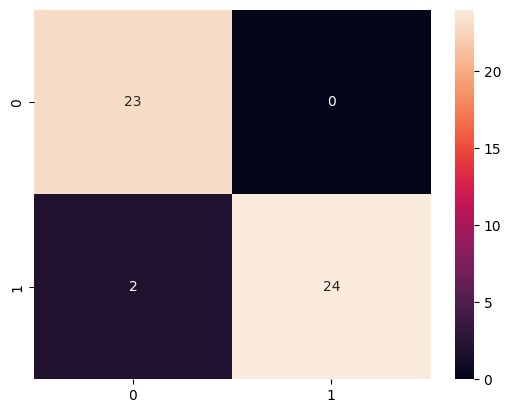

In [108]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc_score=accuracy_score(y_logistic_test,y_logistic_pred)
print("accuracy_score:",acc_score ,"\n")
print("confusion_matrix:\n",confusion_matrix(y_logistic_test,y_logistic_pred),"\n")
conf_matrix=sns.heatmap(confusion_matrix(y_logistic_test,y_logistic_pred),annot=True,)
conf_matrix


## Logistic regressiom om Random data

In [112]:
from sklearn.datasets import make_classification

In [114]:
xr,yr=make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=15)

In [117]:
xr_train,xr_test,yr_train,yr_test=train_test_split(xr,yr,test_size=0.2,random_state=0)

In [118]:
logistic_random=LogisticRegression()
logistic_random.fit(xr_train,yr_train)

LogisticRegression()

In [119]:
yr_pred=logistic_random.predict(xr_test)

accuracy_score: 0.935 

confusion_matrix:
 [[93  5]
 [ 8 94]] 



<Axes: >

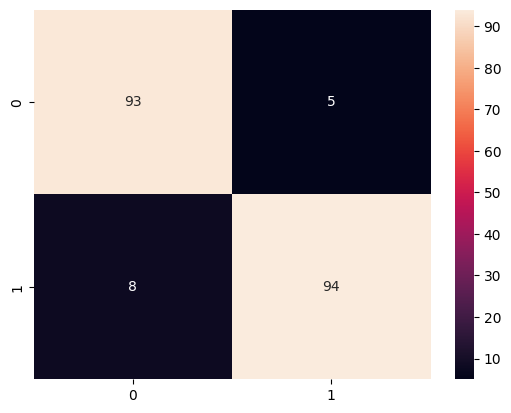

In [121]:
accu_score=accuracy_score(yr_test,yr_pred)
print("accuracy_score:",accu_score ,"\n")
print("confusion_matrix:\n",confusion_matrix(yr_test,yr_pred),"\n")
confMatrix=sns.heatmap(confusion_matrix(yr_test,yr_pred),annot=True,)
confMatrix